## Langkah 1: Preparation

Tahap ini berfungsi untuk mempersiapkan beberapa alat (library) di Python yang akan digunakan untuk berbagai analisis data, visualisasi, pemetaan, dan prediksi.

In [1]:
# === SETUP LINGKUNGAN ===
!pip install --upgrade pip

# library utama untuk data dan visualisasi
!pip install pandas numpy matplotlib seaborn plotly scikit-learn folium fuzzywuzzy[speedup] python-Levenshtein

# library untuk analisis geospasial
!apt-get update -qq
!apt-get install -y -qq libspatialindex-dev libgdal-dev gdal-bin
!pip install geopandas pyarrow

# library untuk forecasting (optional, nanti di akhir project)
!pip install prophet==1.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 104.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [python-Levenshtein]
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package python3-numpy.
(Reading database ... 126718 files and directories currently installed.)
Preparing to unpack .../0-python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu22.04.1) ...
Selecting previously unselected package python3-gdal.
Preparing to unpack .../1-python3-gdal_3.8.4+dfsg-1~jammy0_amd64.deb ...
Unpacking python3-gdal (3.8.4+dfsg-1~jammy0) ...
Selecting

## Langkah 2: Upload Dataset

Pada tahap ini, kita akan mengunggah dua dataset utama yang berisi jumlah kasus penyakit **Demam Berdarah Dengue (DBD)** dan **Malaria** berdasarkan kabupaten/kota di Indonesia.

Langkah ini bertujuan untuk:
- Memuat data mentah dari sumber resmi (Dinas Kesehatan).
- Melihat struktur awal data sebelum dilakukan pembersihan dan analisis.

Dataset:
- `dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v3_data.csv`
- `dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v3_data.csv`


In [2]:
from google.colab import files
import pandas as pd

# === Upload dua file CSV ===
uploaded = files.upload()

# Pastikan nama file sesuai setelah upload
dbd = pd.read_csv("dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v3_data.csv")
malaria = pd.read_csv("dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v3_data.csv")

# Tampilkan beberapa baris pertama
print("==== DATA DBD ====")
display(dbd.head())

print("\n==== DATA MALARIA ====")
display(malaria.head())


Saving dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v3_data.csv to dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v3_data.csv
Saving dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v3_data.csv to dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v3_data.csv
==== DATA DBD ====


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3477,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,854,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,799,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3466,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,561,ORANG,2016



==== DATA MALARIA ====


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,66,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,5,ORANG,2016


### Catatan:
Dari hasil preview di atas, kedua dataset memiliki kolom serupa:
- **kode_provinsi, nama_provinsi, kode_kabupaten_kota, nama_kabupaten_kota, jumlah_kasus, tahun.**
Ini memudahkan kita untuk melakukan penggabungan (merge) pada tahap analisis selanjutnya.

Langkah berikutnya adalah **pembersihan data (data cleaning)** agar siap digunakan dalam analisis dan visualisasi.


## LANGKAH 3: PEMERIKSAAN DAN PEMBERSIHAN DATA

Pada tahap ini dilakukan pemeriksaan awal terhadap data DBD dan Malaria untuk memastikan tidak ada nilai kosong, duplikasi, maupun kesalahan format data. Langkah ini penting agar hasil analisis berikutnya valid dan akurat.

In [3]:
# Cek apakah ada nilai kosong (missing values)
print("=== CEK NILAI KOSONG (MISSING VALUES) ===")
print("DATA DBD:")
print(dbd.isnull().sum(), "\n")

print("DATA MALARIA:")
print(malaria.isnull().sum(), "\n")

# Cek apakah ada data duplikat
print("=== CEK DUPLIKAT ===")
print(f"Jumlah duplikat DBD: {dbd.duplicated().sum()}")
print(f"Jumlah duplikat Malaria: {malaria.duplicated().sum()}\n")

# Cek tipe data
print("=== TIPE DATA ===")
print("DATA DBD:")
print(dbd.dtypes, "\n")

print("DATA MALARIA:")
print(malaria.dtypes, "\n")

# Cek rentang tahun dan kasus tidak wajar
print("=== CEK NILAI TIDAK WAJAR ===")
print("DATA DBD:")
print(dbd.describe(), "\n")

print("DATA MALARIA:")
print(malaria.describe())

=== CEK NILAI KOSONG (MISSING VALUES) ===
DATA DBD:
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_kasus           0
satuan                 0
tahun                  0
dtype: int64 

DATA MALARIA:
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_kasus           0
satuan                 0
tahun                  0
dtype: int64 

=== CEK DUPLIKAT ===
Jumlah duplikat DBD: 0
Jumlah duplikat Malaria: 0

=== TIPE DATA ===
DATA DBD:
id                      int64
kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
jumlah_kasus            int64
satuan                 object
tahun                   int64
dtype: object 

DATA MALARIA:
id                      int64
kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten

## Langkah 4: Normalisasi & Gabung Data

Pada tahap ini, dilakukan proses normalisasi untuk menyamakan struktur dataset DBD dan Malaria agar dapat digabungkan. Kolom yang digunakan hanya yang relevan untuk analisis, seperti tahun, lokasi, dan jumlah kasus.

In [4]:
# Tambahkan kolom jenis penyakit
dbd['penyakit'] = 'Demam Berdarah Dengue (DBD)'
malaria['penyakit'] = 'Malaria'

# Pilih kolom yang sama
kolom_penting = ['tahun', 'nama_kabupaten_kota', 'nama_provinsi', 'penyakit', 'jumlah_kasus']

dbd_norm = dbd[kolom_penting]
malaria_norm = malaria[kolom_penting]

# Gabungkan kedua dataset
penyakit_df = pd.concat([dbd_norm, malaria_norm], ignore_index=True)

# Cek hasil gabungan
print("=== DATA GABUNGAN ===")
print(penyakit_df.head())

print("\nJumlah total baris:", len(penyakit_df))
print("Perbandingan jumlah data per penyakit:")
print(penyakit_df['penyakit'].value_counts())

=== DATA GABUNGAN ===
   tahun nama_kabupaten_kota nama_provinsi                     penyakit  \
0   2016     KABUPATEN BOGOR    JAWA BARAT  Demam Berdarah Dengue (DBD)   
1   2016  KABUPATEN SUKABUMI    JAWA BARAT  Demam Berdarah Dengue (DBD)   
2   2016   KABUPATEN CIANJUR    JAWA BARAT  Demam Berdarah Dengue (DBD)   
3   2016   KABUPATEN BANDUNG    JAWA BARAT  Demam Berdarah Dengue (DBD)   
4   2016     KABUPATEN GARUT    JAWA BARAT  Demam Berdarah Dengue (DBD)   

   jumlah_kasus  
0          3477  
1           854  
2           799  
3          3466  
4           561  

Jumlah total baris: 486
Perbandingan jumlah data per penyakit:
penyakit
Demam Berdarah Dengue (DBD)    243
Malaria                        243
Name: count, dtype: int64


Dataset gabungan ini menjadi dasar untuk analisis tren penyakit, perbandingan antar daerah, dan visualisasi multi-penyakit. Selanjutnya, analisis eksploratif (EDA) dapat dilakukan untuk menemukan pola dan insight penting.

## Langkah 5: Eksplorasi & Visualisasi Data (EDA – Exploratory Data Analysis)

Tahap ini penting karena:
1. Memberikan insight awal yang bisa langsung terlihat (tren, perbandingan, pola).
2. Menunjukkan kemampuan analitis dan storytelling
3. Menjadi bahan utama untuk laporan atau dashboard interaktif nanti.

Tujuan:

📊 Bagaimana tren kasus DBD dan Malaria dari tahun ke tahun?

🗺️ Kabupaten/kota mana dengan jumlah kasus tertinggi untuk masing-masing penyakit?

⚖️ Apakah DBD dan Malaria memiliki pola yang mirip atau berbeda secara waktu?

📉 Apakah terdapat penurunan atau peningkatan signifikan dalam periode tertentu?

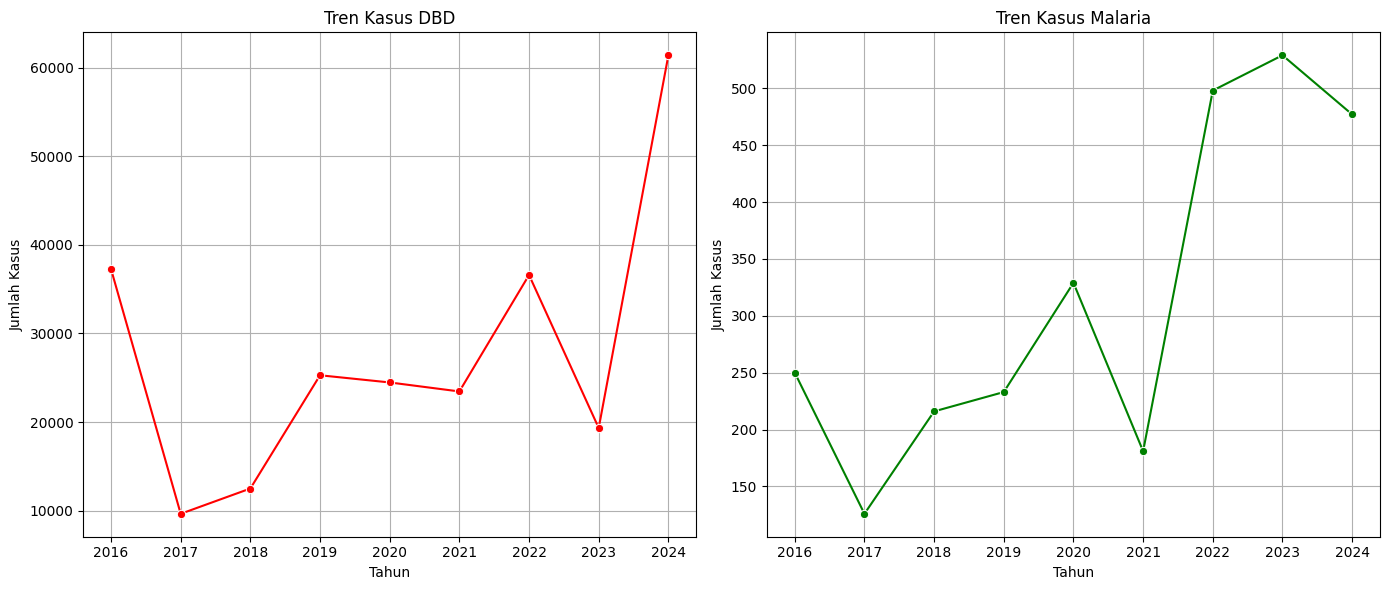

In [9]:
# ===============================================================
# LANGKAH 5A: TREN KASUS PER TAHUN
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Agregasi jumlah kasus per tahun dan penyakit
trend = penyakit_df.groupby(['tahun', 'penyakit'])['jumlah_kasus'].sum().reset_index()

# Plot tren kasus
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.lineplot(data=trend[trend['penyakit'] == 'Demam Berdarah Dengue (DBD)'],
             x='tahun', y='jumlah_kasus', marker='o', ax=axes[0], color='red')
axes[0].set_title('Tren Kasus DBD')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Kasus')
axes[0].grid(True)

sns.lineplot(data=trend[trend['penyakit'] == 'Malaria'],
             x='tahun', y='jumlah_kasus', marker='o', ax=axes[1], color='green')
axes[1].set_title('Tren Kasus Malaria')
axes[1].set_xlabel('Tahun')
axes[1].set_ylabel('Jumlah Kasus')
axes[1].grid(True)

plt.tight_layout()
plt.show()



Analisis Tren Kasus Penyakit DBD dan Malaria (2016–2024)

🔴 1. Tren DBD (Demam Berdarah Dengue)
1. Dari 2016 hingga 2024, kasus DBD sangat fluktuatif.
2. Terlihat penurunan tajam di 2017, lalu tren meningkat kembali secara bertahap hingga mencapai puncak tertinggi pada 2024 (lebih dari 60.000 kasus).
3. Pola ini menunjukkan adanya siklus periodik, kemungkinan besar dipengaruhi oleh:
- Faktor cuaca dan musim hujan, yang meningkatkan populasi nyamuk Aedes aegypti.
- Mobilitas penduduk di wilayah padat seperti Bogor, Bandung, dan Bekasi.
4. Secara umum, meskipun sempat menurun pada periode 2017–2019, tren akhir menunjukkan peningkatan signifikan, menandakan potensi risiko wabah yang harus diantisipasi.

🟢 2. Tren Malaria
1. Kasus Malaria relatif rendah, tapi menunjukkan kecenderungan naik sejak 2020.
2. Puncak kasus terjadi sekitar 2023, dengan jumlah lebih dari 500 kasus.
3. Polanya lebih stabil dibanding DBD, tanpa fluktuasi ekstrem.
4. Peningkatan di akhir periode dapat berkaitan dengan:
- Kegiatan migrasi penduduk ke wilayah endemis.
- Faktor lingkungan seperti peningkatan kelembapan atau area rawan genangan.
5. Meskipun skalanya kecil, kenaikan konsisten menunjukkan Malaria belum sepenuhnya terkontrol dan tetap menjadi isu kesehatan lokal.

## Insight
Tren DBD dan Malaria menunjukkan dua pola epidemiologi berbeda: DBD bersifat wabah siklik dengan peningkatan tajam di tahun-tahun terakhir, sementara Malaria cenderung stabil namun belum berhasil dieliminasi sepenuhnya.
Analisis ini menegaskan pentingnya strategi kesehatan berbasis wilayah: pengendalian vektor perkotaan untuk DBD dan intervensi lingkungan pedesaan untuk Malaria.

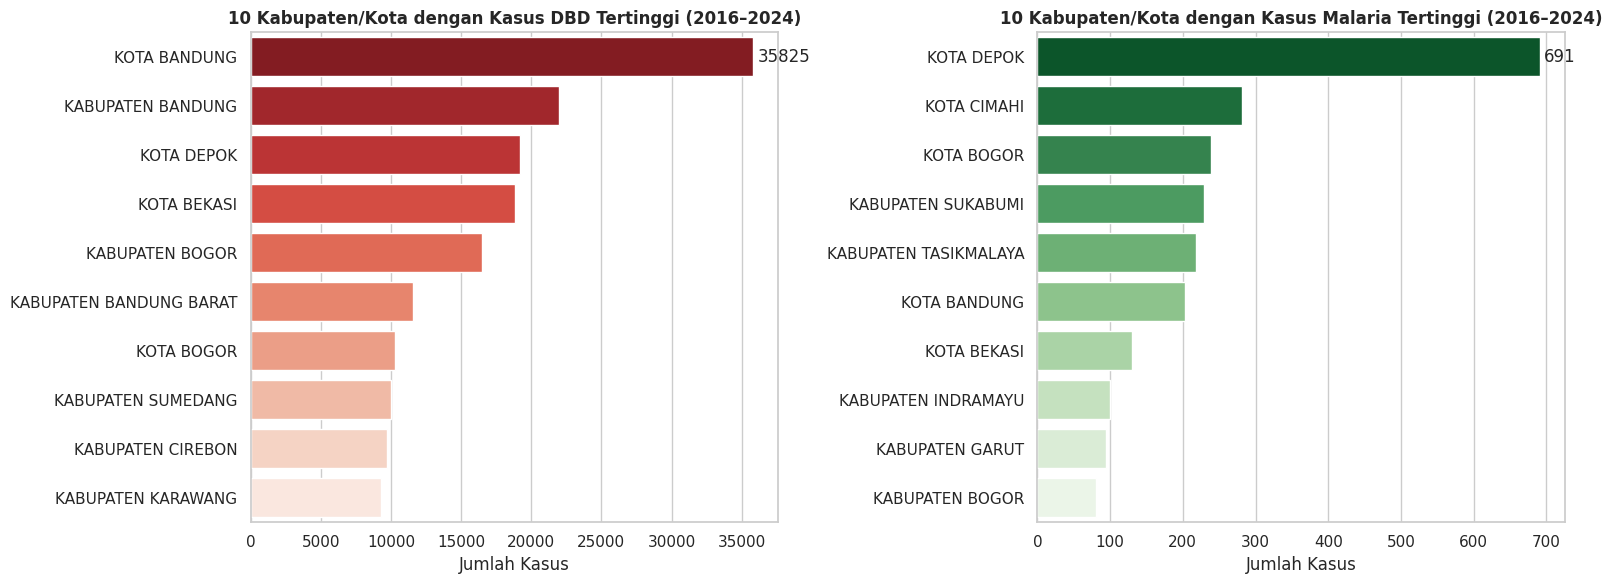

In [14]:
# ===============================================================
# LANGKAH 5B: 10 KABUPATEN/KOTA DENGAN KASUS TERTINGGI
# ===============================================================

# Ambil total kasus per kabupaten dan penyakit
top_kab = penyakit_df.groupby(['nama_kabupaten_kota', 'penyakit'])['jumlah_kasus'].sum().reset_index()

# Ambil top 10 untuk tiap penyakit
top10_dbd = top_kab[top_kab['penyakit'] == 'Demam Berdarah Dengue (DBD)'].nlargest(10, 'jumlah_kasus')
top10_malaria = top_kab[top_kab['penyakit'] == 'Malaria'].nlargest(10, 'jumlah_kasus')

# Visualisasi side-by-side
sns.set_theme(style="whitegrid", font_scale=1.0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafik DBD
sns.barplot(
    data=top10_dbd,
    x='jumlah_kasus',
    y='nama_kabupaten_kota',
    hue='nama_kabupaten_kota',
    palette='Reds_r',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('10 Kabupaten/Kota dengan Kasus DBD Tertinggi (2016–2024)', fontsize=12, weight='bold')
axes[0].set_xlabel('Jumlah Kasus')
axes[0].set_ylabel('')
axes[0].bar_label(axes[0].containers[0], fmt='%d', label_type='edge', padding=3)

# Grafik Malaria
sns.barplot(
    data=top10_malaria,
    x='jumlah_kasus',
    y='nama_kabupaten_kota',
    hue='nama_kabupaten_kota',
    palette='Greens_r',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('10 Kabupaten/Kota dengan Kasus Malaria Tertinggi (2016–2024)', fontsize=12, weight='bold')
axes[1].set_xlabel('Jumlah Kasus')
axes[1].set_ylabel('')
axes[1].bar_label(axes[1].containers[0], fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

## DBD

Pola Umum:
Demam Berdarah Dengue (DBD) memiliki jumlah kasus jauh lebih tinggi dibandingkan Malaria di seluruh kabupaten/kota di Jawa Barat.
Ini sejalan dengan kondisi iklim dan lingkungan perkotaan Jawa Barat yang lebih mendukung berkembangnya nyamuk Aedes aegypti (vektor DBD) dibanding Anopheles (vektor Malaria).

Insight:
Kota/kabupaten dengan urbanisasi tinggi dan kepadatan penduduk besar cenderung memiliki kasus DBD lebih banyak. Pola ini menunjukkan pentingnya intervensi kesehatan berbasis lingkungan perkotaan — misalnya program “Gerakan 3M Plus” dan pengendalian jentik di wilayah padat.

## Malaria

Insight utama:
Kasus malaria di Jawa Barat relatif rendah dan tidak terpusat di satu wilayah. Polanya menunjukkan transmisi lokal kecil atau imported cases, bukan daerah endemik. Program surveilans aktif dan deteksi dini tetap penting untuk mencegah reintroduksi malaria di provinsi non-endemik seperti Jawa Barat.

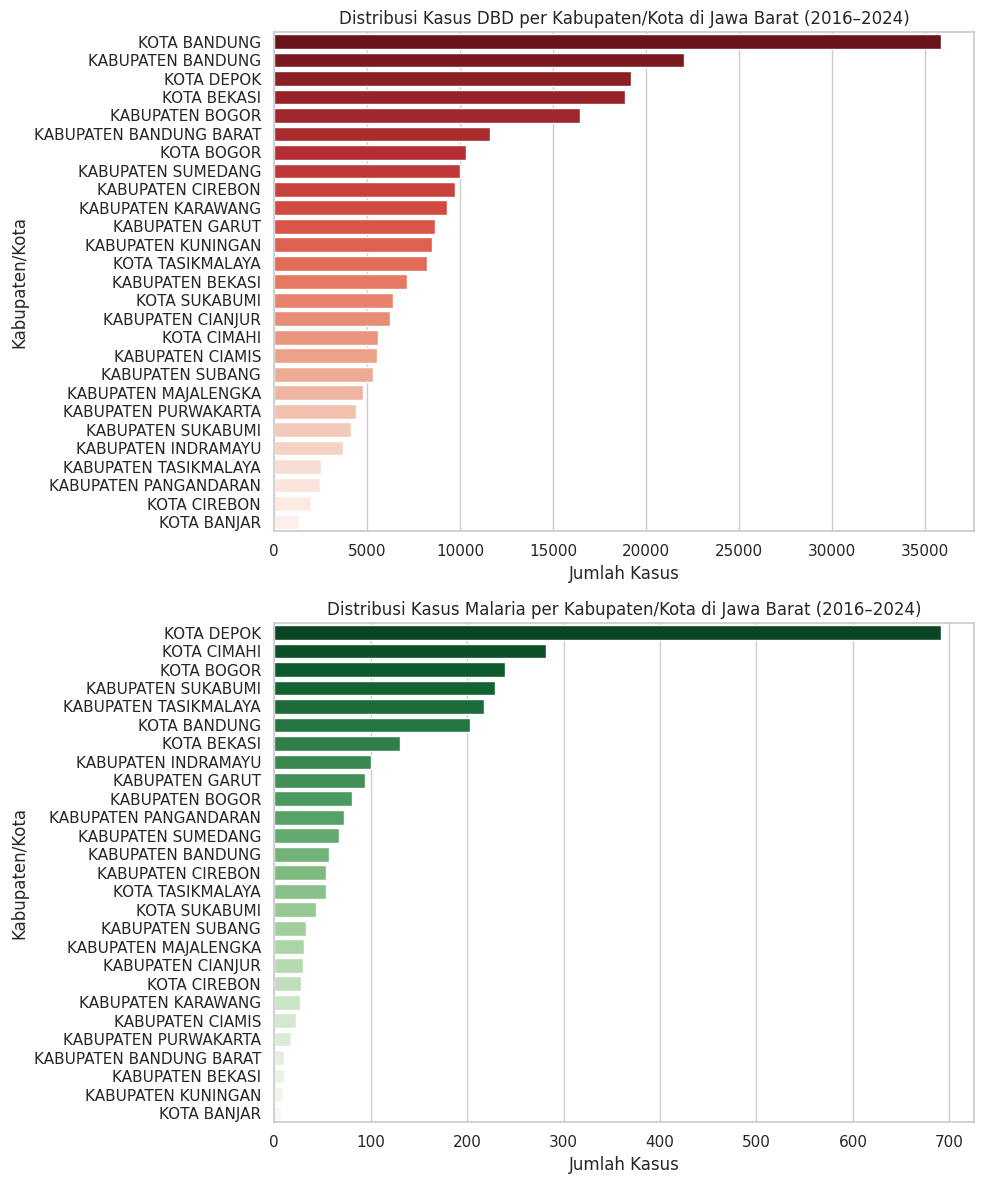

In [20]:
# ===============================================================
# LANGKAH 5C: DISTRIBUSI JUMLAH KASUS PER KABUPATEN/KOTA
# ===============================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan total kasus per kabupaten dan penyakit
agg = penyakit_df.groupby(['nama_kabupaten_kota', 'penyakit'])['jumlah_kasus'].sum().reset_index()

# Pisahkan DBD dan Malaria
agg_dbd = agg[agg['penyakit'] == 'Demam Berdarah Dengue (DBD)'].sort_values('jumlah_kasus', ascending=False)
agg_malaria = agg[agg['penyakit'] == 'Malaria'].sort_values('jumlah_kasus', ascending=False)

# Buat visualisasi horizontal barplot (heat-style)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(
    data=agg_dbd,
    y='nama_kabupaten_kota',
    x='jumlah_kasus',
    hue='nama_kabupaten_kota',
    palette='Reds_r',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Distribusi Kasus DBD per Kabupaten/Kota di Jawa Barat (2016–2024)')
axes[0].set_xlabel('Jumlah Kasus')
axes[0].set_ylabel('Kabupaten/Kota')

sns.barplot(
    data=agg_malaria,
    y='nama_kabupaten_kota',
    x='jumlah_kasus',
    hue='nama_kabupaten_kota',
    palette='Greens_r',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Distribusi Kasus Malaria per Kabupaten/Kota di Jawa Barat (2016–2024)')
axes[1].set_xlabel('Jumlah Kasus')
axes[1].set_ylabel('Kabupaten/Kota')

plt.tight_layout()
plt.show()

## Interpretasi & Insight
Distribusi DBD

Tampak kontras tajam antar-kabupaten: beberapa kota (Bandung, Depok, Bekasi) memiliki jumlah kasus jauh di atas rata-rata, menandakan konsentrasi risiko tinggi di wilayah urban.

Kabupaten dengan kasus rendah (seperti Pangandaran, Ciamis, Sukabumi) cenderung daerah rural/pegunungan → risiko menurun.

Distribusi Malaria

Grafik jauh lebih datar: menunjukkan jumlah kasus rendah dan merata.

Daerah dengan angka sedikit lebih tinggi (Depok, Cimahi, Sukabumi) kemungkinan besar kasus impor atau sporadis, bukan endemik.

Insight

Perbandingan visual langsung menunjukkan gap epidemiologis:
DBD = masalah perkotaan,
Malaria = insiden rendah acak.

Ini berguna untuk prioritas sumber daya kesehatan:
Kota besar perlu fokus pada pengendalian DBD, sementara kabupaten pedalaman cukup mempertahankan pencegahan dasar malaria.

# Kesimpulan dan Insight Akhir

Berdasarkan hasil eksplorasi data penyakit di Provinsi Jawa Barat, khususnya Demam Berdarah Dengue (DBD) dan Malaria, diperoleh beberapa temuan penting sebagai berikut:

---

## 1. Sebaran Kasus Penyakit

Visualisasi (Langkah 5A) menunjukkan bahwa kasus DBD memiliki jumlah jauh lebih tinggi dibandingkan Malaria di hampir seluruh kabupaten/kota di Jawa Tengah.  
Sebagian besar kabupaten mencatat **kasus DBD dalam ratusan hingga ribuan kasus**, sedangkan **kasus Malaria cenderung sangat rendah atau mendekati nol**.

Temuan ini mengindikasikan bahwa:
- Penyakit **DBD merupakan permasalahan kesehatan utama** yang masih perlu diwaspadai.  
- Penyakit **Malaria sudah relatif terkendali** di wilayah Jawa Barat, mungkin karena keberhasilan program eliminasi malaria dan kondisi geografis yang kurang mendukung penyebaran vektornya.

---

## 2. Kabupaten/Kota dengan Kasus Tertinggi

Berdasarkan hasil analisis (Langkah 5B):
- **Top 10 Kabupaten/Kota DBD** menunjukkan bahwa wilayah seperti *Kota Bandung*, *Kota Depok*, dan *Kota Bekasi* termasuk daerah dengan **angka kasus DBD tertinggi**.  
- Sedangkan untuk **Malaria**, hanya beberapa wilayah seperti *Depok* dan *Cimahi* yang mencatat jumlah kasus, dan jumlahnya masih jauh lebih kecil dibandingkan DBD.

Faktor yang kemungkinan berpengaruh:
- **Kepadatan penduduk tinggi**, urbanisasi, dan sanitasi lingkungan di wilayah perkotaan dapat memperbesar risiko DBD.  
- Wilayah dengan **topografi pesisir atau perbatasan hutan** memiliki potensi kasus malaria, walaupun jumlahnya kecil.

---

## 3. Pola Umum yang Terlihat

Dari visualisasi tambahan (Langkah 5C), terlihat adanya:
- **Dominasi DBD di wilayah tengah dan utara Jawa Barat**, berdekatan dengan daerah padat penduduk.  
- **Malaria lebih muncul di wilayah selatan dan barat**, namun dengan intensitas rendah.

---

## Kesimpulan Umum

Secara keseluruhan, hasil eksplorasi data menunjukkan bahwa:
- Provinsi Jawa Tengah **masih memiliki beban penyakit DBD yang signifikan**, khususnya di daerah perkotaan besar.  
- Program pengendalian malaria telah menunjukkan hasil positif dengan jumlah kasus yang sangat rendah.  
- Upaya pencegahan DBD melalui pengendalian vektor (nyamuk Aedes aegypti) dan peningkatan kesadaran masyarakat tetap perlu diperkuat.

---

## Rekomendasi Sederhana

1. **Peningkatan edukasi masyarakat** mengenai 3M (Menguras, Menutup, Mengubur) tempat penampungan air.  
2. **Monitoring lingkungan padat penduduk** dengan potensi genangan air tinggi.  
3. **Pemanfaatan data spasial dan visualisasi interaktif** untuk mendukung pengambilan keputusan oleh Dinas Kesehatan dalam pencegahan penyakit berbasis wilayah.


In [23]:
penyakit_df.to_csv('dbd_malaria_clean.csv', index=False)